### Analyzing the World Bank's Twitter Feed, Judy Yang, DAT10 Project
### Part 3. Text Exploration

In [330]:
pwd

u'/Users/judyyang/Documents/GA_DS_course/Final_Project/notebooks'

In [331]:
from datetime import datetime
import time
import json
import pandas as pd
import operator 
import preprocess
from collections import Counter
#from textblob import TextBlob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#% sign 

import numpy as np
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

from ttp import ttp

pd.options.display.max_columns = 50
pd.options.display.max_rows= 50
pd.options.display.width= 120

In [332]:
wb = pd.read_json('./data/WorldBank_n3201_clean_jan25_2016')
wb.shape

(3203, 13)

In [333]:
wb.columns

Index([u'created_at', u'favorite_count', u'has_at', u'has_ht', u'has_link', u'id', u'is_RT', u'length',
       u'retweet_count', u'tags', u'text', u'text_clean', u'users'],
      dtype='object')

In [334]:
wb.text.describe()

count                                                  3203
unique                                                 3199
top       RT @JimKim_WBG: We can end poverty, but we'll ...
freq                                                      2
Name: text, dtype: object

In [335]:
#Q: what is unicode exactly?
wb.text.values

array([ u'Women contribute 60-80% of labor in #African #Agriculture. Support is critical: https://t.co/Q7g3p2gu6s https://t.co/hWOCGX23VT',
       u'Inclusive growth in last 20yrs has allowed #Ghana to more than halve its #poverty rate: https://t.co/hYZplcntCN https://t.co/xkWCF2LCyD',
       u'How public-private partnerships can play a constructive role in global economies in 2016: https://t.co/jyZ40PyhEC https://t.co/3N1i1yhEPZ',
       ...,
       u'Can an immigrant help #EndPoverty? We say yes! @dengueFever is proof: https://t.co/nBMXB5VIaI #Music4Dev https://t.co/FSilgpQamF',
       u'Ending poverty means #education for the 250m children who can\u2019t read or write: https://t.co/Z2ALwoo9zF https://t.co/ULOpZABJ0x',
       u'#LatAm\u2019s poorer families see slower #incomegrowth since 2010. What does this do to #inequality? https://t.co/YjJenQ930b #lacfeaturegraph'], dtype=object)

In [336]:
wb.sort_values("retweet_count", ascending=False).head(2)

,created_at,favorite_count,has_at,has_ht,has_link,id,is_RT,length,retweet_count,tags,text,text_clean,users
867,2015-12-01 09:22:32,0,True,True,True,671620386493177856,True,135,1218,climatechange COP21,"RT @UN: ""Investing in #climatechange is a way ...",RT Investing in climatechange is a way to...,UN
519,2015-12-22 22:47:47,0,True,False,True,679433177954426880,True,140,1190,,RT @UNICEF: Girls are not property. They have ...,RT Girls are not property They have a righ...,UNICEF UNICEFPakistan


In [337]:
#why is there no scrolling in this ipython notebook?
#check retweet and favorites
wb.sort_values("favorite_count", ascending=False).head(3)

,created_at,favorite_count,has_at,has_ht,has_link,id,is_RT,length,retweet_count,tags,text,text_clean,users
2782,2015-08-26 03:01:02,505,False,True,True,636372752623083520,False,134,375,ServingECD,150 million children under 5 don't have access...,150 million children under 5 don t have access...,
133,2016-01-16 13:05:15,420,False,True,True,688346273276121088,False,124,388,SriLanka WDR2016,#SriLanka is the cheapest place for mobile. Se...,SriLanka is the cheapest place for mobile Se...,
378,2016-01-01 15:05:25,364,False,False,True,682940695980699648,False,140,1057,,Where the extreme poor live\nIndia 33% \nChin...,Where the extreme poor live India 33 China ...,


In [338]:
wb.describe()

,favorite_count,has_at,has_ht,has_link,id,is_RT,length,retweet_count
count,3203.000000,3203,3203,3203,3.203000e+03,3203,3203.000000,3203.000000
mean,35.660006,0.360599,0.852014,0.976897,6.578737e+17,0.110521,132.106463,62.167968
std,27.852105,0.480249,0.355142,0.150255,1.780666e+16,0.313587,10.918137,63.263070
min,0.000000,False,False,False,6.273292e+17,False,33.000000,0.000000
25%,20.000000,0,1,1,6.442634e+17,0,128.000000,31.000000
50%,31.000000,0,1,1,6.552784e+17,0,135.000000,47.000000
75%,45.000000,1,1,1,6.731664e+17,0,140.000000,72.500000
max,505.000000,True,True,True,6.916683e+17,True,148.000000,1218.000000


## Examine favorite and retweet count trends

In [339]:
#questions
#Q: how to add the school function
#look for tweets with poverty
#which tweets have the most favorite, the most retweet
#what are the most used words
#when are the most tweets
#what time of day should the President be tweeting?
#what are the most popular tweets
#can we add if there is a picture in the tweet, that may help retweets
#how to know if a tweet has a picture or not

In [340]:
#wb['textblob']=TextBlob("wb.text")

In [341]:
#Q: installing strftime?
#wb['year']=wb.created_at.apply(lambda x: x.strftime('%y'))
wb['year_month']=wb.created_at.apply(lambda x: x.strftime('%y-%m'))

In [342]:
wb.groupby('year_month').median()

,favorite_count,has_at,has_ht,has_link,id,is_RT,length,retweet_count
year_month,,,,,,,,
15-08,28,False,True,True,6.325382e+17,False,134,45.0
15-09,24,False,True,True,6.447404e+17,False,136,39.0
15-10,29,False,True,True,6.544493e+17,False,135,40.0
15-11,35,False,True,True,6.661349e+17,False,136,54.5
15-12,39,False,True,True,6.769323e+17,False,135,57.0
16-01,43,False,True,True,6.871528e+17,False,136,68.5


In [343]:
wb.groupby('year_month').mean()

,favorite_count,has_at,has_ht,has_link,id,is_RT,length,retweet_count
year_month,,,,,,,,
15-08,32.230769,0.357692,0.809615,0.980769,6.327469e+17,0.109615,130.888462,56.603846
15-09,25.890499,0.399356,0.866345,0.980676,6.445647e+17,0.101449,132.958132,47.014493
15-10,31.076433,0.445860,0.826752,0.954140,6.545571e+17,0.090446,131.903185,49.870064
15-11,38.522167,0.317734,0.886700,0.990148,6.660680e+17,0.133005,131.950739,74.073892
15-12,43.910603,0.309771,0.885655,0.987526,6.769661e+17,0.130977,132.070686,77.374220
16-01,51.858974,0.238462,0.858974,0.984615,6.871662e+17,0.117949,132.989744,87.320513


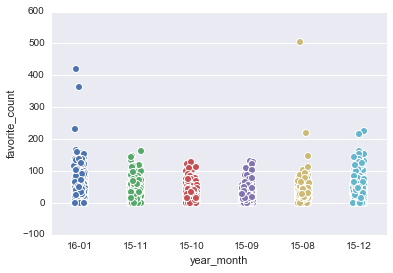

In [344]:
#Q: why are my year-months sorted out of order
#how to save this as a file to be copied elsewhere

sns.stripplot(x="year_month",y="favorite_count",data=wb,jitter=True)
plt.show()

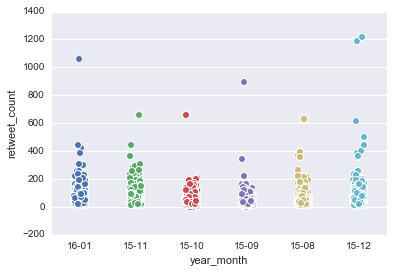

In [345]:
#examine the high retweet and favorite items
#how to change the axis 
#sns.boxplot(x="year_month",y="retweet_count",data=wb)
sns.stripplot(x="year_month",y="retweet_count",data=wb,jitter=True)
plt.show()

In [346]:
#plt.plot(wb.year_month, wb.favorite_count)
#plt.show()

**Part 2. Tokenize the tweets**
- **What:** Separate text into units such as sentences or words
- **Why:** Gives structure to previously unstructured text
- **Notes:** Relatively easy with English language text, not easy with some languages

In [347]:
wb.retweet_count.describe()

count    3203.000000
mean       62.167968
std        63.263070
min         0.000000
25%        31.000000
50%        47.000000
75%        72.500000
max      1218.000000
Name: retweet_count, dtype: float64

In [348]:
# define X and y

X = wb.text_clean
#X=wb.tags

#y needs to be binomial
wb['retweet_high']= np.where(wb.retweet_count>100, 1, 0)
wb['favorite_high']= np.where(wb.favorite_count>50, 1, 0)

#y = wb.retweet_high
y = wb.favorite_high

#wb.retweet_high.describe()
wb.favorite_high.describe()

count    3203.000000
mean        0.191695
std         0.393696
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: favorite_high, dtype: float64

In [349]:
# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [350]:
# use CountVectorizer to create document-term matrices from X_train and X_test
#vect = CountVectorizer()
# remove English stop words
vect = CountVectorizer(stop_words='english', lowercase=True)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [351]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_train_dtm.shape

(2402, 4047)

In [352]:
# last 50 features
#Q: how to get rid of the URLs
print vect.get_feature_names()[-50:]

[u'works', u'workshop', u'world', u'worldaidsday', u'worldbank', u'worldfoodday', u'worldpneumoniaday', u'worldprematurityday', u'worldradiologyday', u'worldteachersday', u'worldtoiletday', u'worldwide', u'worrying', u'worse', u'worsen', u'worst', u'worth', u'wow', u'write', u'wrong', u'wrote', u'wwweek', u'year', u'yearinreview', u'years', u'yemencrisis', u'yes', u'yesterday', u'yield', u'yielding', u'yields', u'young', u'younger', u'youth', u'youth4climate', u'youthbiz', u'youthday', u'youthdialogues', u'youthnow', u'yr', u'yrs', u'yunus', u'za', u'zaatari', u'zanzibar', u'zaporowski', u'zarghony', u'zero', u'zerohunger', u'zones']


In [353]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

predict retweet or favorites

In [354]:
# use default options for CountVectorizer
vect = CountVectorizer()

# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use Naive Bayes to predict the star rating
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_class)

0.792759051186


In [355]:
# calculate null accuracy
y_test_binary = np.where(y_test==1, 1, 0)
max(y_test_binary.mean(), 1 - y_test_binary.mean())

0.80774032459425715

In [356]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print 'Features: ', X_train_dtm.shape[1]
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

In [357]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 1))
tokenize_test(vect)

Features:  4265
Accuracy:  0.792759051186


In [358]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  22887
Accuracy:  0.81897627965


In [359]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 3))
tokenize_test(vect)

Features:  46039
Accuracy:  0.820224719101


In [360]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 4))
tokenize_test(vect)

Features:  68658
Accuracy:  0.8177278402


**Part 5. Introduction to TextBlob**


In [361]:
# print the first review
print wb.text_clean[0]

Women contribute 60 80  of labor in  African  Agriculture  Support is critical     


In [362]:
# save it as a TextBlob object
review = TextBlob(wb.text_clean[0])

In [363]:
# list the words
review.words

WordList([u'Women', u'contribute', u'60', u'80', u'of', u'labor', u'in', u'African', u'Agriculture', u'Support', u'is', u'critical'])

In [364]:
# list the sentences
review.sentences

[Sentence("Women contribute 60 80  of labor in  African  Agriculture  Support is critical     ")]

In [365]:
# some string methods are available
review.lower()

TextBlob("women contribute 60 80  of labor in  african  agriculture  support is critical     ")

**Part 6. Stemming and Lemmatization**

- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms

In [366]:
# initialize stemmer
stemmer = SnowballStemmer('english')

# stem each word
print [stemmer.stem(word) for word in review.words]

[u'women', u'contribut', u'60', u'80', u'of', u'labor', u'in', u'african', u'agricultur', u'support', u'is', u'critic']


**Part 7. Term Frequency and Inverse Document Frequency:**
- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents)
- **Notes:** Used for search engine scoring, text summarization, document clustering

In [367]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(wb.text_clean)
features = vect.get_feature_names()
dtm.shape

(3203, 4647)

**Part 8: Using TF-IDF to Summarize a Tweet**

Reddit's autotldr uses the [SMMRY](http://smmry.com/about) algorithm, which is based on TF-IDF!

In [368]:
def summarize():
    
    # choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 120:
        review_id = np.random.randint(0, len(wb))
        review_text = wb.text_clean[review_id]
        review_length = len(review_text)
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print 'TOP SCORING WORDS:'
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print word
    
    # print 5 random words
    print '\n' + 'RANDOM WORDS:'
    random_words = np.random.choice(word_scores.keys(), size=5, replace=False)
    for word in random_words:
        print word
    
    # print the review
    print '\n' + review_text

In [369]:
wb.text_clean.describe()

count                                                  3203
unique                                                 3099
top        DYK gas flared at oil fields yr could power a...
freq                                                      3
Name: text_clean, dtype: object

In [370]:
summarize()

TOP SCORING WORDS:
rt
poor
amp
people
better

RANDOM WORDS:
poor
wbg
better
listen
rt

RT   WBG  To all the courageous people who are making this world a better place Listen to the aspirations of the poor  amp  lift up your  


#### Part 9: Sentiment Analysis

In [371]:
# understanding the apply method
wb.head(1)

,created_at,favorite_count,has_at,has_ht,has_link,id,is_RT,length,retweet_count,tags,text,text_clean,users,year_month,retweet_high,favorite_high
0,2016-01-25 17:05:53,36,False,True,True,691668323533262848,False,127,51,African Agriculture,Women contribute 60-80% of labor in #African #...,Women contribute 60 80 of labor in African ...,,16-01,0,0


In [372]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text.decode('utf-8')).sentiment.polarity

In [373]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
wb['sentiment'] = wb.text_clean.apply(detect_sentiment)

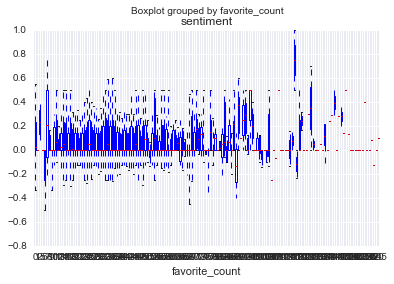

In [374]:
# box plot of sentiment grouped by stars
wb.boxplot(column='sentiment', by='favorite_count')
#like good news

In [375]:
# reviews with most positive sentiment
wb[wb.sentiment == 1].text.head()

1078    Government works best when citizens are engage...
113     Tourism leads to entry-level jobs that allow p...
1569    What is the best news in the world today, acco...
1730    "One person's trash is another person's treasu...
1828    RT @JimKim_WBG: This is the best story in the ...
Name: text, dtype: object

In [376]:
# reviews with most negative sentiment
wb[wb.sentiment == -1].text.head()

Series([], Name: text, dtype: object)

In [ ]:
#time with 